In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import *

f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

    Определить корни
    
    Найти интервалы, на которых функция возрастает
    
    Найти интервалы, на которых функция убывает
    
    Построить график
    
    Вычислить вершину
    
    Определить промежутки, на котором f > 0
    
    Определить промежутки, на котором f < 0

In [346]:
def calc(i):
    return (-12 * i**4 * sin(cos(i)) - 18 * i**3 + 5 * i**2 + 10 * i - 30)
    
def func(x):
    return [calc(i) for i in x]

def solve_func(x):
    prev_value = None
    list_result = []
    for i in x:
        y = calc(i)
        if prev_value and ((prev_value < 0 and y > 0 ) or (prev_value > 0 and y < 0)):
            list_result.append(round(i,5))
        prev_value = y
    return list_result

def get_data(array_x, array_y):
    to_up = array_y[0] - array_y[1] < 0
    result = {
        'up_down':[],
        'top':[]
    }
    up_down_array = [[],[],to_up]
    top_array = []
    
    up_down_array[0].append(array_x[0])
    up_down_array[1].append(array_y[0])
    for i,y in enumerate(array_y):
        if i > 0:
            if (to_up and y < array_y[i-1]) or (not to_up and y > array_y[i-1]):
                result['up_down'].append(up_down_array)
                result['top'].append([array_x[i],y])
                to_up = not to_up
                up_down_array = [[],[], to_up]
                
            up_down_array[0].append(array_x[i])
            up_down_array[1].append(y)
            if i == len(array_y) - 1:
                result['up_down'].append(up_down_array)
    return result

def get_pos_neg(array_x, array_y):
    result = []
    to_pos = array_y[0] >= 0
    pos_neg_array = [[],[],to_pos]
    pos_neg_array[0].append(array_x[0])
    pos_neg_array[1].append(array_y[0])
    
    for i,y in enumerate(array_y):
        if i > 0:
            if (y > 0 and to_pos == False) or (y < 0 and to_pos == True):
                result.append(pos_neg_array)
                to_pos = not to_pos
                pos_neg_array = [[],[],to_pos]
                
            pos_neg_array[0].append(array_x[i])
            pos_neg_array[1].append(y)
            
            if i == len(array_y) - 1:
                result.append(pos_neg_array)
    return result

In [352]:
min = -20
max = 20
x = np.arange(min,max,0.01)
list_y = func(x)


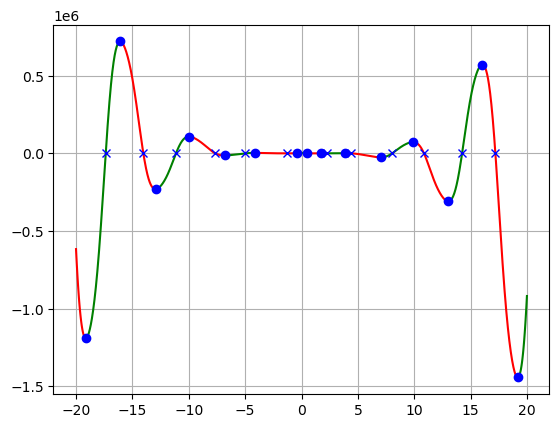

In [353]:
data = get_data(x, list_y)

for block in data['up_down']:
    color = 'g' if block[2] else 'r'
    plt.plot(block[0], block[1], color);

for top in data['top']:
    plt.plot(top[0], top[1], 'bo');

result = solve_func(x)

for i in result:
     plt.plot(i, 0, 'bx');

plt.grid()

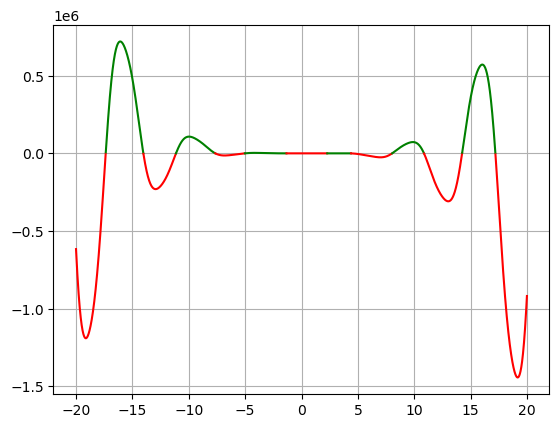

In [354]:
date_pos_neg = get_pos_neg(x, list_y)

for block in date_pos_neg:
    color = 'g' if block[2] else 'r'
    plt.plot(block[0], block[1], color);

plt.grid()

In [356]:
print(f'Корни {result} на промежутке "x" от {min} до {max} ')

Корни [-17.36, -14.02, -11.13, -7.65, -5.02, -1.33, 2.28, 4.39, 8.04, 10.87, 14.25, 17.2] на промежутке "x" от -20 до 20 


In [357]:
for interval in data['up_down']:
    start = interval[0][0]
    end = interval[0][len(interval[0]) - 1]
    if interval[2]:
        print(f'Возрастает от {start} до {end}')
    else:
        print (f'Убывает от {start} до {end}')

Убывает от -20.0 до -19.129999999999864
Возрастает от -19.119999999999862 до -16.079999999999387
Убывает от -16.069999999999386 до -12.939999999998896
Возрастает от -12.929999999998895 до -9.979999999998434
Убывает от -9.969999999998432 до -6.829999999997941
Возрастает от -6.81999999999794 до -4.1699999999975255
Убывает от -4.159999999997524 до -0.3899999999969346
Возрастает от -0.379999999996933 до 0.45000000000319673
Убывает от 0.4600000000031983 до 1.7000000000033921
Возрастает от 1.7100000000033937 до 3.8200000000037235
Убывает от 3.830000000003725 до 7.000000000004221
Возрастает от 7.010000000004222 до 9.88000000000467
Убывает от 9.890000000004672 до 13.010000000005164
Возрастает от 13.020000000005162 до 16.03000000000563
Убывает от 16.040000000005634 до 19.170000000006127
Возрастает от 19.180000000006125 до 19.990000000006248


In [358]:
print('Вершины:')
for top in data['top']:
    print(f'({top[0]}, {top[1]})')

Вершины:
(-19.119999999999862, -1189694.57812837)
(-16.069999999999386, 719793.422689579)
(-12.929999999998895, -230205.653298427)
(-9.969999999998432, 107673.543829577)
(-6.81999999999794, -13818.8562780789)
(-4.159999999997524, 3111.17002690305)
(-0.379999999996933, -32.2906824586173)
(0.4600000000031983, -26.5136037193022)
(1.7100000000033937, -74.0921211343861)
(3.830000000003725, 872.057581886628)
(7.010000000004222, -25609.1108122534)
(9.890000000004672, 72626.6583337192)
(13.020000000005162, -308664.139215896)
(16.040000000005634, 571110.077829719)
(19.180000000006125, -1442072.70499036)


In [359]:
for pos_neg in date_pos_neg:
    start = pos_neg[0][0]
    end = pos_neg[0][len(pos_neg[0]) - 1]
    if pos_neg[2]:
        print(f'f > 0 от {start} до {end}')
    else:
        print (f'f < 0 от {start} до {end}')

f < 0 от -20.0 до -17.36999999999959
f > 0 от -17.359999999999587 до -14.029999999999067
f < 0 от -14.019999999999065 до -11.139999999998615
f > 0 от -11.129999999998613 до -7.659999999998071
f < 0 от -7.6499999999980695 до -5.02999999999766
f > 0 от -5.019999999997658 до -1.339999999997083
f < 0 от -1.3299999999970815 до 2.2700000000034812
f > 0 от 2.280000000003483 до 4.380000000003811
f < 0 от 4.390000000003813 до 8.030000000004382
f > 0 от 8.040000000004383 до 10.860000000004824
f < 0 от 10.870000000004826 до 14.240000000005352
f > 0 от 14.250000000005357 до 17.19000000000581
f < 0 от 17.200000000005815 до 19.990000000006248
